<a href="https://colab.research.google.com/github/Abhishek0716ss/MachineLearning-2025/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading MNIST dataset...
Training samples: 11824, Test samples: 2956
Training Logistic Regression model...

 Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1575

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



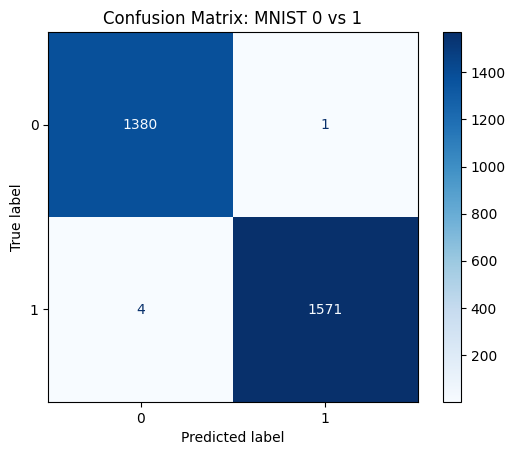

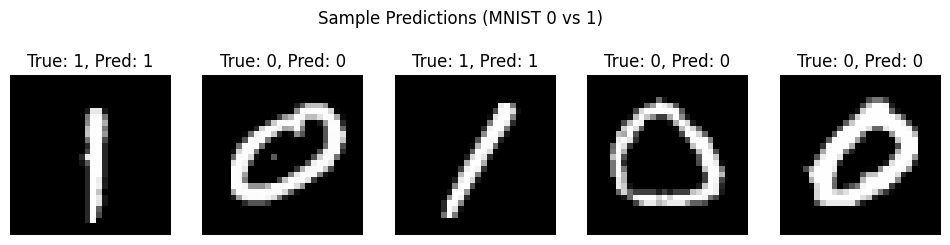

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

print("Training Logistic Regression model...")
model = LogisticRegression(
    solver='lbfgs',
    max_iter=300,
    n_jobs=-1
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("Confusion Matrix: MNIST 0 vs 1")
plt.show()


fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    image = X_test[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.suptitle("Sample Predictions (MNIST 0 vs 1)")
plt.show()
